内容来自 [七年实现财富自由|雪球](https://xueqiu.com/u/1164950442)

In [15]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
# 设置中文字体
plt.rcParams['font.sans-serif'] = ['Microsoft YaHei', 'SimHei'] # 设置支持中文的字体
plt.rcParams['axes.unicode_minus'] = False # 正确显示负号

import akshare as ak
print(ak.__version__)

1.17.24


# 获取数据
## 获取ETF数据

In [16]:
df1 = ak.fund_etf_hist_em(symbol="513500", period="daily", start_date="20000101", adjust="hfq")
df1

  0%|          | 0/11 [00:00<?, ?it/s]

,日期,开盘,收盘,最高,最低,成交量,成交额,振幅,涨跌幅,涨跌额,换手率
0,2014-01-15,0.994,0.986,0.996,0.976,1328554,130998296.0,1.99,-1.79,-0.018,1.36
1,2014-01-16,0.988,0.991,0.994,0.988,397330,39379678.0,0.61,0.51,0.005,0.41
2,2014-01-17,0.993,0.987,0.993,0.985,169781,16786119.0,0.81,-0.40,-0.004,0.17
3,2014-01-20,0.983,0.982,0.988,0.982,139374,13745061.0,0.61,-0.51,-0.005,0.14
4,2014-01-21,0.982,0.984,0.996,0.970,218530,21520868.0,2.65,0.20,0.002,0.22
...,...,...,...,...,...,...,...,...,...,...,...
2793,2025-07-15,4.236,4.262,4.262,4.234,1781706,378798895.0,0.66,1.14,0.048,1.83
2794,2025-07-16,4.234,4.230,4.238,4.228,1539316,325773543.0,0.23,-0.75,-0.032,1.58
2795,2025-07-17,4.246,4.262,4.270,4.246,2251254,478820205.0,0.57,0.76,0.032,2.31
2796,2025-07-18,4.282,4.286,4.292,4.282,1031171,221116721.0,0.23,0.56,0.024,1.06


In [17]:
df1.rename(columns={'最高':'high', '最低':'low', '收盘': 'close', '开盘': 'open', '成交量': 'volume'}, inplace=True)
df1

,日期,open,close,high,low,volume,成交额,振幅,涨跌幅,涨跌额,换手率
0,2014-01-15,0.994,0.986,0.996,0.976,1328554,130998296.0,1.99,-1.79,-0.018,1.36
1,2014-01-16,0.988,0.991,0.994,0.988,397330,39379678.0,0.61,0.51,0.005,0.41
2,2014-01-17,0.993,0.987,0.993,0.985,169781,16786119.0,0.81,-0.40,-0.004,0.17
3,2014-01-20,0.983,0.982,0.988,0.982,139374,13745061.0,0.61,-0.51,-0.005,0.14
4,2014-01-21,0.982,0.984,0.996,0.970,218530,21520868.0,2.65,0.20,0.002,0.22
...,...,...,...,...,...,...,...,...,...,...,...
2793,2025-07-15,4.236,4.262,4.262,4.234,1781706,378798895.0,0.66,1.14,0.048,1.83
2794,2025-07-16,4.234,4.230,4.238,4.228,1539316,325773543.0,0.23,-0.75,-0.032,1.58
2795,2025-07-17,4.246,4.262,4.270,4.246,2251254,478820205.0,0.57,0.76,0.032,2.31
2796,2025-07-18,4.282,4.286,4.292,4.282,1031171,221116721.0,0.23,0.56,0.024,1.06


<Axes: >

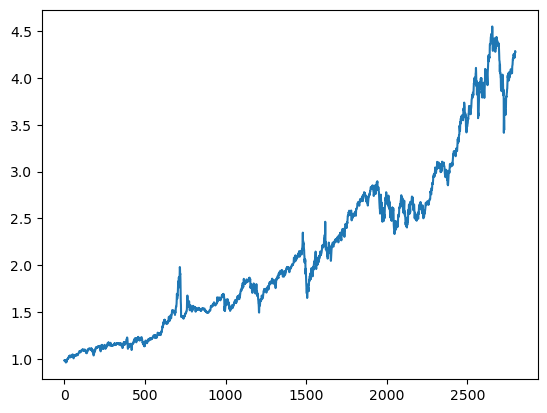

In [10]:
df1['close'].plot()

## 获取场外基金数据

In [18]:
df2 = ak.fund_open_fund_info_em(symbol="217022", indicator="累计净值走势")
print(df2)

            净值日期    累计净值
0     2012-03-21  1.0000
1     2012-03-23  1.0000
2     2012-03-26  1.0010
3     2012-03-27  1.0010
4     2012-03-28  1.0010
...          ...     ...
3243  2025-07-14  2.0764
3244  2025-07-15  2.0768
3245  2025-07-16  2.0770
3246  2025-07-17  2.0772
3247  2025-07-18  2.0773

[3248 rows x 2 columns]


<Axes: >

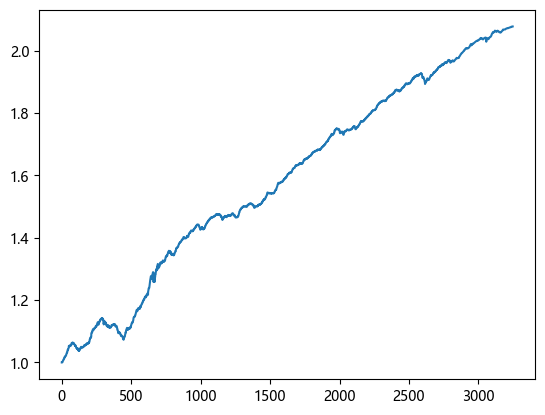

In [19]:
df2['累计净值'].plot()

## 获取A股后复权数据

In [20]:
df3 = ak.stock_zh_a_hist(symbol="000001", period="daily", start_date="20170301", end_date="20240528", adjust="hfq")
print(df3)

              日期    股票代码       开盘       收盘       最高       最低      成交量  \
0     2017-03-01  000001  1211.76  1211.76  1219.26  1209.26   346994   
1     2017-03-02  000001  1214.26  1204.26  1218.01  1203.01   403629   
2     2017-03-03  000001  1201.76  1200.51  1204.26  1195.51   342655   
3     2017-03-06  000001  1200.51  1206.76  1208.01  1199.26   404511   
4     2017-03-07  000001  1205.51  1206.76  1208.01  1200.51   294673   
...          ...     ...      ...      ...      ...      ...      ...   
1755  2024-05-22  000001  1639.33  1639.33  1661.84  1626.83  2115531   
1756  2024-05-23  000001  1635.58  1619.33  1643.08  1615.58  1841623   
1757  2024-05-24  000001  1615.58  1608.08  1630.58  1606.83  1398276   
1758  2024-05-27  000001  1608.08  1633.08  1635.58  1608.08  1454361   
1759  2024-05-28  000001  1631.83  1619.33  1641.83  1614.33  1204323   

               成交额    振幅   涨跌幅    涨跌额   换手率  
0     3.301580e+08  0.83  0.10   1.25  0.21  
1     3.823959e+08  1.24 -0.62 

<Axes: >

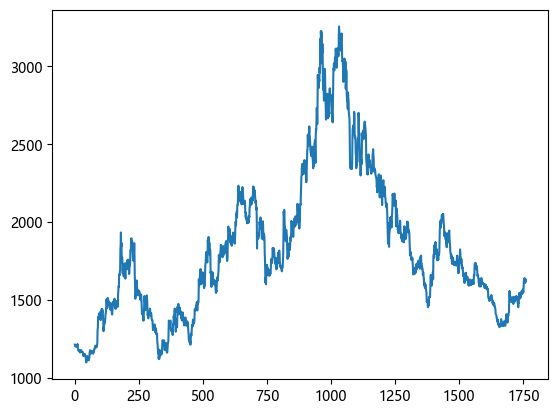

In [21]:
df3["收盘"].plot()

## 获取A股指数数据

In [22]:
df4 = ak.stock_zh_index_daily(symbol="sh000300")
print(df4)

            date      open      high       low     close       volume
0     2002-01-04  1316.455  1316.455  1316.455  1316.455            0
1     2002-01-07  1302.084  1302.084  1302.084  1302.084            0
2     2002-01-08  1292.714  1292.714  1292.714  1292.714            0
3     2002-01-09  1272.645  1272.645  1272.645  1272.645            0
4     2002-01-10  1281.261  1281.261  1281.261  1281.261            0
...          ...       ...       ...       ...       ...          ...
5705  2025-07-14  4021.214  4034.920  4017.668  4017.668  20791717500
5706  2025-07-15  4023.990  4042.657  3994.263  4019.064  19104293100
5707  2025-07-16  4019.393  4027.857  3993.921  4007.202  15102730800
5708  2025-07-17  4005.067  4034.594  4005.067  4034.491  16124904100
5709  2025-07-18  4039.871  4064.638  4039.318  4058.549  18621106300

[5710 rows x 6 columns]


<Axes: xlabel='date'>

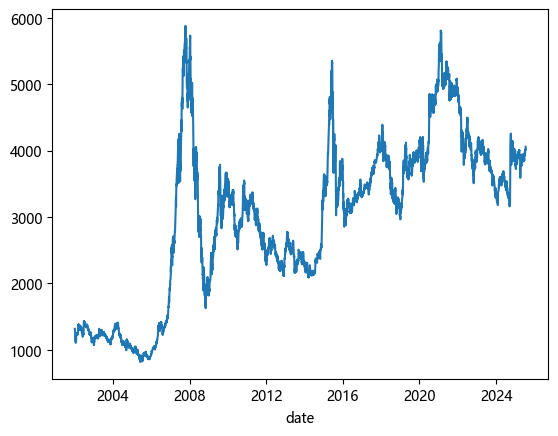

In [23]:
df4.index = df4.date
df4["close"].plot()

# 批量获取数据
## 批量获取多支etf

In [25]:
def fetch_etf(symbol): 
    df = ak.fund_etf_hist_em(symbol=symbol, period="daily", start_date="20000101", adjust="hfq")
    cols = {'最高':'high','最低':'low','收盘':'close','开盘':'open','成交量':'volume','日期':'date'}
    #print(df)
    df.rename(columns=cols,inplace=True)
    return df[list(cols.values())]

In [21]:
symbols = ["513100","513500"]
for s in symbols:
    print(f"获取{s}并保存到csv")
    df = fetch_etf(s)
    df.to_csv(f"data/{s}.csv", index=False)

获取513100并保存到csv
获取513500并保存到csv


## 加载数据并绘图

<Axes: xlabel='date'>

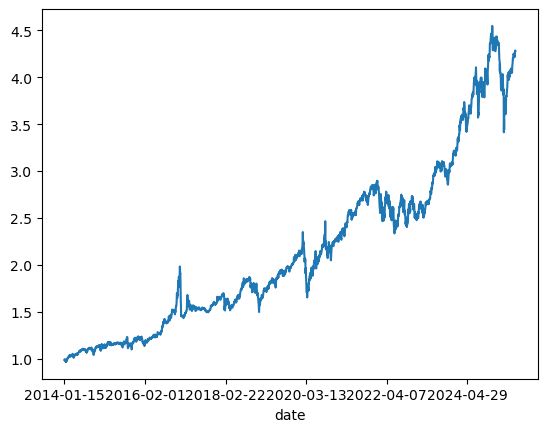

In [24]:
s = "513500"
df5 = pd.read_csv(f"data/{s}.csv")
df5.index = df5.date
df5["close"].plot()

In [26]:
symbols = [
    '513100', #纳指100 
    '513500', #标普500
    '510300', #沪深300
    '159915', #创业板
    '518880', #黄金 ETF
    '512890', #红利低波
    '159985', #豆粕
    '511880', #银华日利-货币ETF
    '511260', #十年国债 ETF
]

for s in symbols:
    print(f"获取{s}并保存到csv")
    df = fetch_etf(s)
    df.to_csv(f"data/{s}.csv", index=False)

获取513100并保存到csv
获取513500并保存到csv
获取510300并保存到csv
获取159915并保存到csv
获取518880并保存到csv
获取512890并保存到csv
获取159985并保存到csv
获取511880并保存到csv
获取511260并保存到csv


## 加载数据并绘图
### 批量从文件加载数据

In [ ]:
symbols = ['513100','513500']#,'510500','159915','510880'
symbols = {'513100':'纳指100',
           '513500':'标普500',
           '510300':'沪深300',
           '159915':'创业板',
           '518880':'黄金',
           #'512890':'红利低波',
           #'159985':'豆粕',
           '511880':'银华日利-货币ETF'
          }

dfs = []
for s in symbols.keys():
    df = pd.read_csv(f'data/{s}.csv')
    df['symbol'] = s
    dfs.append(df)
    df_all = pd.concat(dfs,axis=0)
    
df_all

,high,low,close,open,volume,date,symbol
0,0.999,0.989,0.997,0.990,877116,2013-05-15,513100
1,0.999,0.994,0.999,0.997,265570,2013-05-16,513100
2,1.000,0.996,0.997,0.999,36379,2013-05-17,513100
3,1.004,0.996,0.997,1.002,80490,2013-05-20,513100
4,0.998,0.994,0.997,0.997,161124,2013-05-21,513100
...,...,...,...,...,...,...,...
2974,132.821,132.812,132.821,132.813,1071268,2025-07-15,511880
2975,132.827,132.821,132.827,132.823,1234589,2025-07-16,511880
2976,132.832,132.827,132.830,132.829,1004811,2025-07-17,511880
2977,132.838,132.830,132.833,132.838,1605493,2025-07-18,511880


### 绘制走势图

<Axes: xlabel='date'>

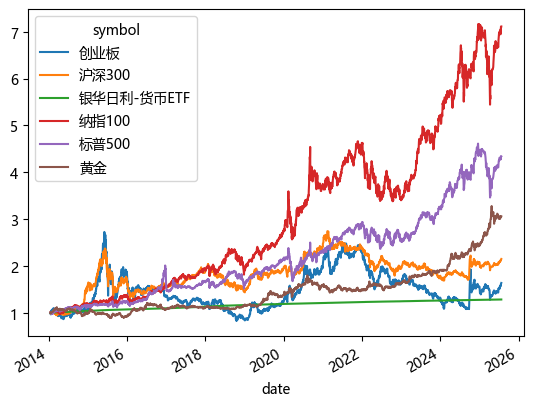

In [ ]:
df_close = (df_close.pct_change() + 1).cumprod()
df_close.dropna(inplace=True)

df_close.plot()